### Dataset ENEM 2018
http://download.inep.gov.br/microdados/microdados_enem_2008.zip

In [1]:
import pandas as pd
import numpy as np

In [2]:
columns = df = pd.read_csv('MICRODADOS_ENEM_2018.csv', encoding='latin-1', sep = ';', nrows = 2).columns

### Algumas colunas apenas complicarão o modelo, e não fazem sentido serem analisadas, portanto foram removidas da análise:

In [3]:
columns_to_drop = [
    'NU_INSCRICAO',
    'NU_ANO',
    'CO_MUNICIPIO_RESIDENCIA',
    'NO_MUNICIPIO_RESIDENCIA',
    'CO_UF_RESIDENCIA',
    'TP_NACIONALIDADE',
    'CO_MUNICIPIO_NASCIMENTO',
    'NO_MUNICIPIO_NASCIMENTO',
    'SG_UF_NASCIMENTO',
    'CO_UF_NASCIMENTO',
    'CO_ESCOLA',
    'CO_MUNICIPIO_ESC',
    'NO_MUNICIPIO_ESC',
    'CO_UF_ESC',
    'SG_UF_ESC',
    'TP_DEPENDENCIA_ADM_ESC',
    'TP_SIT_FUNC_ESC',
    'IN_BAIXA_VISAO',
    'IN_CEGUEIRA',
    'IN_SURDEZ',
    'IN_DEFICIENCIA_AUDITIVA',
    'IN_SURDO_CEGUEIRA',
    'IN_DEFICIENCIA_FISICA',
    'IN_VISAO_MONOCULAR',
    'IN_OUTRA_DEF',
    'IN_GESTANTE',
    'IN_LACTANTE',
    'IN_IDOSO',
    'IN_ESTUDA_CLASSE_HOSPITALAR',
    'IN_BRAILLE',
    'IN_AMPLIADA_24',
    'IN_AMPLIADA_18',
    'IN_LEDOR',
    'IN_ACESSO',
    'IN_TRANSCRICAO',
    'IN_LIBRAS',
    'IN_LEITURA_LABIAL',
    'IN_MESA_CADEIRA_RODAS',
    'IN_MESA_CADEIRA_SEPARADA',
    'IN_APOIO_PERNA',
    'IN_GUIA_INTERPRETE',
    'IN_COMPUTADOR',
    'IN_CADEIRA_ESPECIAL',
    'IN_CADEIRA_CANHOTO',
    'IN_CADEIRA_ACOLCHOADA',
    'IN_PROVA_DEITADO',
    'IN_MOBILIARIO_OBESO',
    'IN_LAMINA_OVERLAY',
    'IN_PROTETOR_AURICULAR',
    'IN_MEDIDOR_GLICOSE',
    'IN_MAQUINA_BRAILE',
    'IN_SOROBAN',
    'IN_MARCA_PASSO',
    'IN_SONDA',
    'IN_MEDICAMENTOS',
    'IN_SALA_INDIVIDUAL',
    'IN_SALA_ESPECIAL',
    'IN_SALA_ACOMPANHANTE',
    'IN_MOBILIARIO_ESPECIFICO',
    'IN_MATERIAL_ESPECIFICO',
    'IN_NOME_SOCIAL',
    'CO_MUNICIPIO_PROVA',
    'NO_MUNICIPIO_PROVA',
    'CO_UF_PROVA',
    'SG_UF_PROVA',
    'TP_PRESENCA_CN',
    'TP_PRESENCA_CH',
    'TP_PRESENCA_LC',
    'TP_PRESENCA_MT',
    'CO_PROVA_CN',
    'CO_PROVA_CH',
    'CO_PROVA_LC',
    'CO_PROVA_MT',
    'TX_RESPOSTAS_CN',
    'TX_RESPOSTAS_CH',
    'TX_RESPOSTAS_LC',
    'TX_RESPOSTAS_MT',
    'TX_GABARITO_CN',
    'TX_GABARITO_CH',
    'TX_GABARITO_LC',
    'TX_GABARITO_MT',
    'TP_STATUS_REDACAO',
    'NU_NOTA_COMP1',
    'NU_NOTA_COMP2',
    'NU_NOTA_COMP3',
    'NU_NOTA_COMP4',
    'NU_NOTA_COMP5',
    'Q008',
    'Q009',
    'Q013',
    'Q014',
    'Q015',
    'Q016',
    'Q017',
    'Q018',
    'Q019',
    'Q020',
    'Q021',
    'Q022',
    'Q023',
    'Q026'    
    ]

In [4]:
columns_to_use = []
for column in columns:
    if column in columns_to_drop:
        pass
    else:
        columns_to_use.append(column)

In [5]:
df = pd.read_csv('MICRODADOS_ENEM_2018.csv', encoding='latin-1', sep = ';', usecols = columns_to_use, skiprows = 800000, nrows = 1000000, names = columns)

In [6]:
df.head()

,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,...,Q004,Q005,Q006,Q007,Q010,Q011,Q012,Q024,Q025,Q027
0,PA,17.0,M,0.0,3,2,0,2,1.0,0,...,A,4,B,A,A,A,B,A,A,C
1,SP,26.0,F,0.0,3,1,8,1,1.0,0,...,B,4,D,A,B,A,B,B,A,A
2,MG,17.0,F,0.0,1,2,0,1,1.0,0,...,D,4,G,A,B,A,B,C,B,A
3,BA,16.0,M,0.0,2,3,0,1,NaN,1,...,B,2,B,B,A,A,B,A,B,A
4,SP,18.0,M,0.0,3,2,0,2,1.0,0,...,B,5,C,A,A,A,B,B,B,A


### Adiciona ao dataset a nota médio do estudante como a média simples das cincos notas (Ciências da Natureza, Ciências Humanas, Linguagens, Matemática e Redação)

In [7]:
df['NOTA_MEDIA'] = (df['NU_NOTA_CN'] + df['NU_NOTA_CH'] + df['NU_NOTA_LC'] + df['NU_NOTA_MT'] + df['NU_NOTA_REDACAO'])/5.0

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 37 columns):
SG_UF_RESIDENCIA         1000000 non-null object
NU_IDADE                 999992 non-null float64
TP_SEXO                  1000000 non-null object
TP_ESTADO_CIVIL          961198 non-null float64
TP_COR_RACA              1000000 non-null int64
TP_ST_CONCLUSAO          1000000 non-null int64
TP_ANO_CONCLUIU          1000000 non-null int64
TP_ESCOLA                1000000 non-null int64
TP_ENSINO                716065 non-null float64
IN_TREINEIRO             1000000 non-null int64
TP_LOCALIZACAO_ESC       297425 non-null float64
IN_DEFICIENCIA_MENTAL    1000000 non-null int64
IN_DEFICIT_ATENCAO       1000000 non-null int64
IN_DISLEXIA              1000000 non-null int64
IN_DISCALCULIA           1000000 non-null int64
IN_AUTISMO               1000000 non-null int64
IN_SEM_RECURSO           1000000 non-null int64
NU_NOTA_CN               747547 non-null float64
NU_NOTA_CH       

In [9]:
print('Antes {}'.format(df.shape))
df.drop(df[(df['Q001']=="H") | (df['Q002']=="H")|(df['Q003']=="F") | (df['Q004']=="F")].index, inplace=True)
print('Depois {}'.format(df.shape))

Antes (1000000, 37)
Depois (784190, 37)


In [10]:
df.tail()

,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,...,Q005,Q006,Q007,Q010,Q011,Q012,Q024,Q025,Q027,NOTA_MEDIA
999994,MG,17.0,F,2.0,3,3,0,1,NaN,1,...,5,J,A,B,A,B,B,B,A,497.88
999996,SP,17.0,M,0.0,0,2,0,2,1.0,0,...,5,C,A,A,A,B,A,B,A,476.30
999997,MT,19.0,F,0.0,3,1,1,1,NaN,0,...,5,C,A,A,A,B,A,A,A,NaN
999998,PR,20.0,M,0.0,0,2,0,2,3.0,0,...,3,B,A,A,A,B,A,A,A,505.52
999999,SP,17.0,M,0.0,3,2,0,2,3.0,0,...,1,C,A,A,A,B,B,B,A,471.22


In [11]:
# Há muito dados faltantes 'NaN' sobre o tipo de localização da escola. Os dados faltantes, preenchi como 'Urbano', pois é o caso mais recorrente
df['TP_LOCALIZACAO_ESC'] = df['TP_LOCALIZACAO_ESC'].fillna(1)

In [12]:
df = df.dropna(axis = 0, how = 'any')

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 399742 entries, 0 to 999999
Data columns (total 37 columns):
SG_UF_RESIDENCIA         399742 non-null object
NU_IDADE                 399742 non-null float64
TP_SEXO                  399742 non-null object
TP_ESTADO_CIVIL          399742 non-null float64
TP_COR_RACA              399742 non-null int64
TP_ST_CONCLUSAO          399742 non-null int64
TP_ANO_CONCLUIU          399742 non-null int64
TP_ESCOLA                399742 non-null int64
TP_ENSINO                399742 non-null float64
IN_TREINEIRO             399742 non-null int64
TP_LOCALIZACAO_ESC       399742 non-null float64
IN_DEFICIENCIA_MENTAL    399742 non-null int64
IN_DEFICIT_ATENCAO       399742 non-null int64
IN_DISLEXIA              399742 non-null int64
IN_DISCALCULIA           399742 non-null int64
IN_AUTISMO               399742 non-null int64
IN_SEM_RECURSO           399742 non-null int64
NU_NOTA_CN               399742 non-null float64
NU_NOTA_CH               399742

In [14]:
df.index = range(df.shape[0])

In [15]:
# confere se o dataset não possui dados faltantes
assert df.notnull().all().all()

In [16]:
import seaborn as sns
#df['NOTA_MEDIA'].plot(kind = 'hist', bins = 100)
sns.distplot(df['NOTA_MEDIA'], bins=150, hist=True, kde=True)

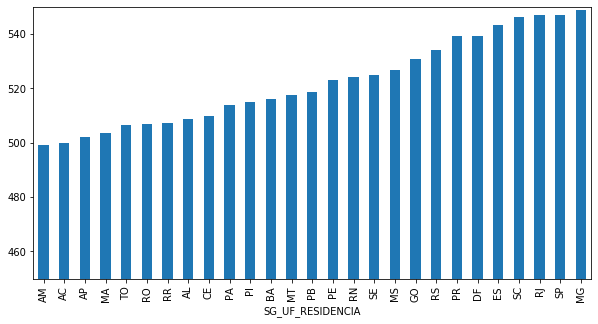

In [17]:
df_uf = df.groupby('SG_UF_RESIDENCIA')
df_uf['NOTA_MEDIA'].mean().sort_values().plot(kind = 'bar', figsize = (10,5), ylim = [450,550])

### Transformando o dataset de variáveis categóricas para variáveis numéricas para treinamento do modelo (get_dummies)
Possíveis features atrapalhando:
- SG_UF_RESIDENCIA
- IN_TREINEIRO

In [18]:
def converte_estado_civil(estado_civil):
    if estado_civil == 0:
        return 'Solteiro'
    elif estado_civil == 1:
        return 'Casado'
    elif estado_civil == 2:
        return 'Divorciado'
    elif estado_civil == 3:
        return 'Viuvo'
    else:
        return estado_civil

In [19]:
def converte_cor_raca(cor_raca):
    if cor_raca == 0:
        return 'Nao_declarado'
    elif cor_raca == 1:
        return 'Branca'
    elif cor_raca == 2:
        return 'Preta'
    elif cor_raca == 3:
        return 'Parda'
    elif cor_raca == 4:
        return 'Amarela'
    elif cor_raca == 5:
        return 'Indigena'
    else:
        return cor_raca

In [20]:
#df['TP_ESTADO_CIVIL'] = df['TP_ESTADO_CIVIL'].apply(converte_estado_civil)
print(df.TP_ESTADO_CIVIL.value_counts())
print('\n')
#df['TP_COR_RACA'] = df['TP_COR_RACA'].apply(converte_cor_raca)
print(df.TP_COR_RACA.value_counts())
print('\n')
print(df.IN_DEFICIENCIA_MENTAL.value_counts())
print('\n')
print(df.IN_DEFICIT_ATENCAO.value_counts())
print('\n')
print(df.IN_DISLEXIA.value_counts())
print('\n')
print(df.IN_AUTISMO.value_counts())
print('\n')
print(df.Q024.value_counts())
print('\n')

0.0    370722
1.0     25142
2.0      3483
3.0       395
Name: TP_ESTADO_CIVIL, dtype: int64


3    197335
1    132305
2     53366
4      8825
0      5555
5      2356
Name: TP_COR_RACA, dtype: int64


0    399676
1        66
Name: IN_DEFICIENCIA_MENTAL, dtype: int64


0    399531
1       211
Name: IN_DEFICIT_ATENCAO, dtype: int64


0    399714
1        28
Name: IN_DISLEXIA, dtype: int64


0    399703
1        39
Name: IN_AUTISMO, dtype: int64


B    188893
A    174314
C     26196
D      7248
E      3091
Name: Q024, dtype: int64




In [21]:
dummies_columns = [
    'SG_UF_RESIDENCIA',
    'TP_SEXO', 
    'TP_ESTADO_CIVIL', 
    'TP_COR_RACA', 
    'TP_ST_CONCLUSAO', 
    'TP_ANO_CONCLUIU', 
    'TP_ESCOLA',
    'TP_ENSINO',
    'TP_LOCALIZACAO_ESC',
    'Q001',
    'Q002',
    'Q003',
    'Q004',
    'Q005',
    'Q006',
    'Q007',
    #'Q008',
    #'Q009',
    'Q010',
    'Q011',
    'Q012',
    #'Q013',
    #'Q014',
    #'Q015',
    #'Q016',
    #'Q017',
    #'Q018',
    #'Q019',
    #'Q020',
    #'Q021',
    #'Q022',
    #'Q023',
    'Q024',
    'Q025',
    #'Q026',
    'Q027'
                ]

In [22]:
df = pd.get_dummies(df, columns = dummies_columns, prefix = dummies_columns, drop_first = True)

In [23]:
df.head()

,NU_IDADE,IN_TREINEIRO,IN_DEFICIENCIA_MENTAL,IN_DEFICIT_ATENCAO,IN_DISLEXIA,IN_DISCALCULIA,IN_AUTISMO,IN_SEM_RECURSO,NU_NOTA_CN,NU_NOTA_CH,...,Q024_B,Q024_C,Q024_D,Q024_E,Q025_B,Q027_B,Q027_C,Q027_D,Q027_E,Q027_F
0,17.0,0,0,0,0,0,0,0,431.8,529.5,...,0,0,0,0,0,0,1,0,0,0
1,17.0,0,0,0,0,0,0,0,699.5,699.0,...,0,1,0,0,1,0,0,0,0,0
2,18.0,0,0,0,0,0,0,0,541.6,631.9,...,1,0,0,0,1,0,0,0,0,0
3,19.0,0,0,0,0,0,0,0,557.0,657.7,...,1,0,0,0,1,0,0,0,0,0
4,18.0,0,0,0,0,0,0,0,612.6,639.4,...,0,1,0,0,1,0,0,1,0,0


### Categoriza o desempenho médio dos alunos em A B C D (3, 2, 1, 0)

In [24]:
nota_q1, nota_q2, nota_q3 = df['NOTA_MEDIA'].quantile([.25, .5, .75])
nota_q1 = 480
nota_q2 = 570
nota_q3 = 660

In [25]:
def classe_abcd(nota_media, q1, q2, q3):
    if nota_media < q1:
        return '0'
    elif nota_media < q2:
        return '1'
    elif nota_media < q3:
        return '2'
    else:
        return '3'

In [26]:
df['CLASSE_NOTA'] = df.apply(lambda x: classe_abcd(x['NOTA_MEDIA'], nota_q1, nota_q2, nota_q3), axis=1)

In [27]:
df['CLASSE_NOTA'].value_counts()

1    166006
0    121270
2     83463
3     29003
Name: CLASSE_NOTA, dtype: int64

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 399742 entries, 0 to 399741
Columns: 150 entries, NU_IDADE to CLASSE_NOTA
dtypes: float64(7), int64(8), object(1), uint8(134)
memory usage: 99.9+ MB


### Separando dados X e dados Target

In [29]:
columns_to_drop_x = ['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_REDACAO', 'NOTA_MEDIA', 'CLASSE_NOTA']
X = df.drop(columns_to_drop_x, axis=1).values
Y = df['CLASSE_NOTA'].values

In [30]:
X.shape

(399742, 143)

In [31]:
Y.shape

(399742,)

In [32]:
X[100]

array([17.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        1.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,
        0.,  1.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  1.,  0.,  0.,
        0.,  1.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,
        0.,  0.,  0.,  1.,  0.,  0.,  0.,  1.,  1.,  0.,  0.,  0.,  0.])

### Separando dados em treino e teste

In [33]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)

In [34]:
print("X_train shape: ", X_train.shape)
print("Y_train shape: ", Y_train.shape)

print("X_test shape: ", X_test.shape)
print("Y_test shape: ", Y_test.shape)

X_train shape:  (319793, 143)
Y_train shape:  (319793,)
X_test shape:  (79949, 143)
Y_test shape:  (79949,)


### Treinando o modelo Decision Tree Classification

In [35]:
# Load libraries
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

### Randomized Search
Uma árvore de decisão envolve muitos parâmetros. Dentre eles:
- max_depth: qual altura máxima a partir do nó a árvore deve ter?
- min_samples_leaf: o menor valor de amostras necessárias para dividir um nó interno
- critrerion: uma função que mede a qualidade de uma divisão. 'gini' ou 'entropy'
- max_features: número máximo de atributos da amostra utilizados para a melhor divisão
    
 Dado o grande volume de dados e hiperparâmetros utilizou-se de uma técnica 'RandomizedSearch' em que se criam ranges de hiperparâmetros e o classificador é treinado de forma aleatória utilizando validação cruzada (nesta caso, k fold de 5 pastas) e partir da combinação de hiperparâmetros definidos

In [39]:
# Setup the parameters and distributions to sample from: param_dist
param_dist = {"max_depth": np.arange(1, 25, 1),
              "max_features": np.arange(3, 25, 1),
              "min_samples_leaf": [1000, 2000, 5000],
              "criterion": ["gini", "entropy"],
              "splitter": ['best', 'random']}

# Instantiate a Decision Tree classifier: tree
tree = DecisionTreeClassifier()

# Instantiate the RandomizedSearchCV object: tree_cv
tree_cv = RandomizedSearchCV(tree, param_dist, cv =5)

# Fit it to the data
tree_cv.fit(X_train, Y_train)

# Print the tuned parameters and score
print("Tuned Decision Tree Parameters: {}".format(tree_cv.best_params_))
print("Best score is {}".format(tree_cv.best_score_))

#Predict the response for test dataset
#y_pred = clf.predict(X_test)

Tuned Decision Tree Parameters: {'splitter': 'best', 'min_samples_leaf': 1000, 'max_features': 18, 'max_depth': 24, 'criterion': 'gini'}
Best score is 0.46561369385821455


In [38]:
np.sqrt(X_train.shape[1])

11.958260743101398

In [40]:
tree = DecisionTreeClassifier(splitter = 'random', criterion = 'gini', max_features = 67, max_depth = 28, min_samples_leaf = 137)
tree.fit(X_train, Y_train)
y_pred = tree.predict(X_test)

In [41]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(Y_test, y_pred))

Accuracy: 0.47675393063077715


In [ ]:
print(Y_test[:10])
print(y_pred[:10])

In [ ]:
print(nota_q1, nota_q2, nota_q3)

### Geração do diagrama da Árvore de decisão

In [ ]:
#!pip install pydotplus
#!pip install graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
feature_cols = df.drop(columns_to_drop_x, axis=1).columns
export_graphviz(tree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = feature_cols,class_names=['D','C', 'B', 'A'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('tree-ENEM.png')
Image(graph.create_png())

### Modelo de RandomForest

In [43]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf = RandomForestClassifier()

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,Y_train)

y_pred = clf.predict(X_test)


param_dist = {"n_estimators": np.arange(100, 120, 1),
              "max_depth": np.arange(1, 15, 1),
              "max_features": np.arange(3, 25, 1),
              "min_samples_leaf": [1000, 2000, 5000],
              "criterion": ["gini", "entropy"]}

# Instantiate the RandomizedSearchCV object: tree_cv
clf_cv = RandomizedSearchCV(clf, param_dist, cv =5)

# Fit it to the data
clf_cv.fit(X_train, Y_train)

# Print the tuned parameters and score
print("Tuned Decision Tree Parameters: {}".format(clf_cv.best_params_))
print("Best score is {}".format(clf_cv.best_score_))

/home/semissatto/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Tuned Decision Tree Parameters: {'n_estimators': 105, 'min_samples_leaf': 1000, 'max_features': 21, 'max_depth': 13, 'criterion': 'gini'}
Best score is 0.4788785245455654


In [ ]:
#clf = RandomForestClassifier() #put best best parameters here
#clf.fit(X_train,Y_train)
#y_pred = clf.predict(X_test)

In [ ]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(Y_test, y_pred))